In [2]:
import warnings
warnings.filterwarnings('ignore')
import torch
dtype = torch.float
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from torch.distributions import normal
import matplotlib.pyplot as plt, numpy as np, pickle
from scipy.stats import norm
from tifffile import imread
import sys
sys.path.append('../')
#from pn2v import *
from lib.gaussianMixtureNoiseModel import GaussianMixtureNoiseModel
from lib import histNoiseModel
from lib.utils import plotProbabilityDistribution
import os
import urllib
import zipfile
from pathlib import Path

Found 21 files.
(21, 1200, 1200)
Signal avg - min: 0.0 max: 1687.4058 mean:  22.051144 std:  50.347507
Signal n2v - min: -17.964579 max: 1540.853 mean:  22.067484 std:  47.109016
Observation - min: 0.0 max: 1417.1545 mean:  21.185982 std:  37.89199


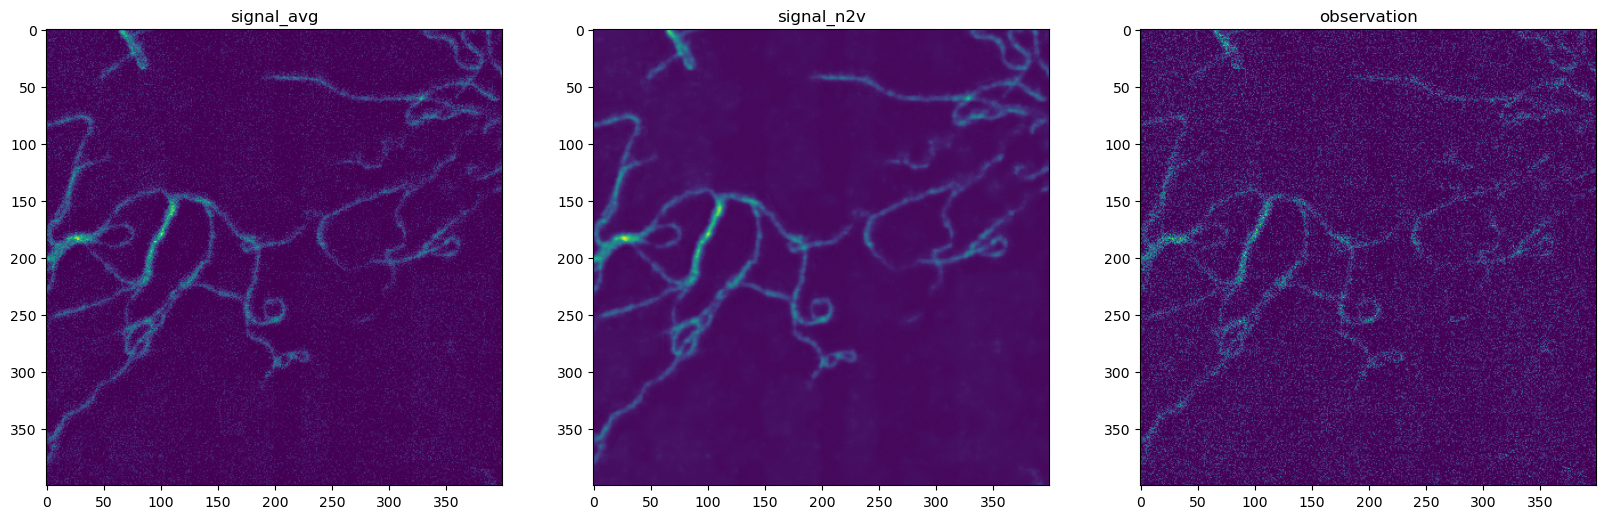

In [2]:
data_path_signal_avg = Path(r"E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\inference\N2V\Vim_fixed_OnGTAvg_mse")
data_path_signal_n2v = Path(r"E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\inference\N2V\Vim_fixed_OnGTAvg_mse")
data_path_obs = Path(r"E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\inference\N2V\Vim_fixed_OnInpSingle_mse")
signal_avg = []
signal_n2v = []
observation = []
observation_norm_0 = []
observation_norm_1 = []

filters = ['tif','tiff']

files_signal = os.listdir(data_path_signal_avg)
files_obs = os.listdir(data_path_obs)

#print(files)
assert len(files_obs) == len(files_signal)
print(f"Found {len(files_signal)} files.")
for i in range (len(files_obs)):
    file_signal = files_signal [i]
    file_obs = files_obs [i]

    if file_signal.split('.')[-1] not in filters:
        print(f"skipping {file_signal} because not in filters")
        continue
    
    im_signal_avg = imread(data_path_signal_avg / file_signal)[0]
    im_signal_n2v = imread(data_path_signal_n2v / file_signal)[1]
    im_obs  = imread(data_path_obs / file_obs)[0]

    sig_0 = im_signal_avg 
    # sig_0 = (sig_0-np.mean(sig_0))/np.std(sig_0)

    sig_1 = im_signal_n2v
    # sig_1[sig_1<0] = 0
    # sig_1 = sig_1 / np.max(sig_1)

    obs = im_obs
    # obs = (obs-np.mean(obs))/np.std(obs)
    # obs[obs<0] = 0
    # obs = obs / np.max(obs)

    observation.append(obs)
    signal_avg.append(sig_0)
    signal_n2v.append(sig_1)
    # observation_norm_0.append(np.max(sig_0)*obs/np.max(obs))
    # observation_norm_1.append(np.max(sig_1)*obs/np.max(obs))


signal_avg = np.stack(signal_avg)
signal_n2v = np.stack(signal_n2v)
observation = np.stack(observation)
# observation_norm_0 = np.stack(observation_norm_0)
# observation_norm_1 = np.stack(observation_norm_1)

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.title("signal_avg")
plt.imshow(signal_avg[0][400:800,400:800])

plt.subplot(1,3,2)
plt.title("signal_n2v")
plt.imshow(signal_n2v[0][400:800,400:800])

plt.subplot(1,3,3)
plt.title("observation")
plt.imshow(observation[0][400:800,400:800])

print(observation.shape)

mean_signal_avg = np.mean(signal_avg)
std_signal_avg = np.std(signal_avg)
min_signal_avg = np.min(signal_avg)
max_signal_avg = np.max(signal_avg)
print("Signal avg - min:",min_signal_avg,"max:",max_signal_avg, "mean: ", mean_signal_avg, "std: ", std_signal_avg)

mean_signal_n2v = np.mean(signal_n2v)
std_signal_n2v = np.std(signal_n2v)
min_signal_n2v = np.min(signal_n2v)
max_signal_n2v = np.max(signal_n2v)
print("Signal n2v - min:",min_signal_n2v,"max:",max_signal_n2v, "mean: ", mean_signal_n2v, "std: ", std_signal_n2v)

mean_observation = np.mean(observation)
std_observation= np.std(observation)
min_obs = np.min(observation)
max_obs = np.max(observation)
print("Observation - min:",min_obs,"max:",max_obs, "mean: ", mean_observation, "std: ", std_observation)


In [3]:
signal_avg_norm = (signal_avg - mean_signal_avg)/std_signal_avg
signal_n2v_norm = (signal_n2v - mean_signal_n2v)/std_signal_n2v
observation_norm = (observation - mean_observation)/std_observation

signal_avg_norm = signal_avg_norm + np.abs(np.min(signal_avg_norm))
signal_n2v_norm = signal_n2v_norm + np.abs(np.min(signal_n2v_norm))
observation_norm = observation_norm + np.abs(np.min(observation_norm))

mean_signal_avg_norm = np.mean(signal_avg_norm)
std_signal_avg_norm = np.std(signal_avg_norm)
min_signal_avg_norm = np.min(signal_avg_norm)
max_signal_avg_norm = np.max(signal_avg_norm)
print("Signal avg - min:",min_signal_avg_norm,"max:",max_signal_avg_norm, "mean: ", mean_signal_avg_norm, "std: ", std_signal_avg_norm)

mean_signal_n2v_norm = np.mean(signal_n2v_norm)
std_signal_n2v_norm = np.std(signal_n2v_norm)
min_signal_n2v_norm = np.min(signal_n2v_norm)
max_signal_n2v_norm = np.max(signal_n2v_norm)
print("Signal n2v - min:",min_signal_n2v_norm,"max:",max_signal_n2v_norm, "mean: ", mean_signal_n2v_norm, "std: ", std_signal_n2v_norm)

mean_observation_norm = np.mean(observation_norm)
std_observation_norm= np.std(observation_norm)
min_obs_norm = np.min(observation_norm)
max_obs_norm = np.max(observation_norm)
print("Observation - min:",min_obs_norm,"max:",max_obs_norm, "mean: ", mean_observation_norm, "std: ", std_observation_norm)

Signal avg - min: 0.0 max: 33.515182 mean:  0.43797812 std:  0.9999993
Signal n2v - min: 0.0 max: 33.08958 mean:  0.84977573 std:  1.0000001
Observation - min: 0.0 max: 37.399845 mean:  0.5591141 std:  1.0000001


Text(0.5, 1.0, 'obs - log')

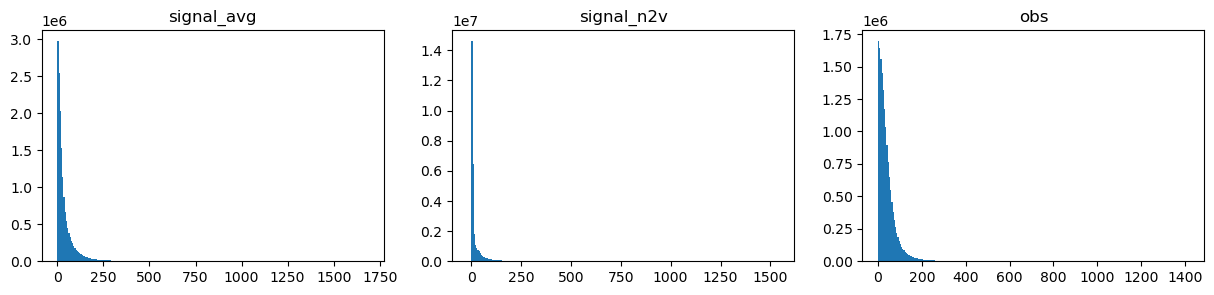

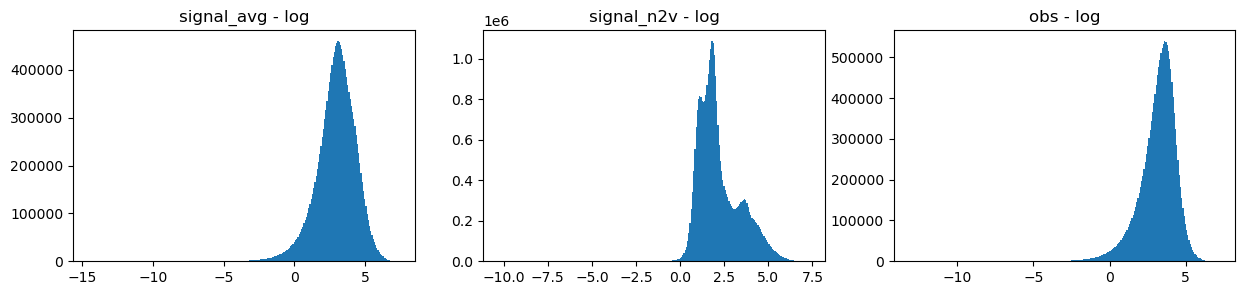

In [4]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.hist(signal_avg[signal_avg!=0].flatten(),bins=256)
plt.title("signal_avg")
plt.subplot(1,3,2)
plt.hist(signal_n2v[signal_n2v!=0].flatten(),bins=256)
plt.title("signal_n2v")
plt.subplot(1,3,3)
plt.hist(observation[observation!=0].flatten(),bins=256)
plt.title("obs")

plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.hist(np.log(signal_avg[signal_avg!=0]).flatten(),bins=256)
plt.title("signal_avg - log")
plt.subplot(1,3,2)
plt.hist(np.log(signal_n2v[signal_n2v!=0]).flatten(),bins=256)
plt.title("signal_n2v - log")
plt.subplot(1,3,3)
plt.hist(np.log(observation[observation!=0]).flatten(),bins=256)
plt.title("obs - log")

Text(0.5, 1.0, 'obs_norm')

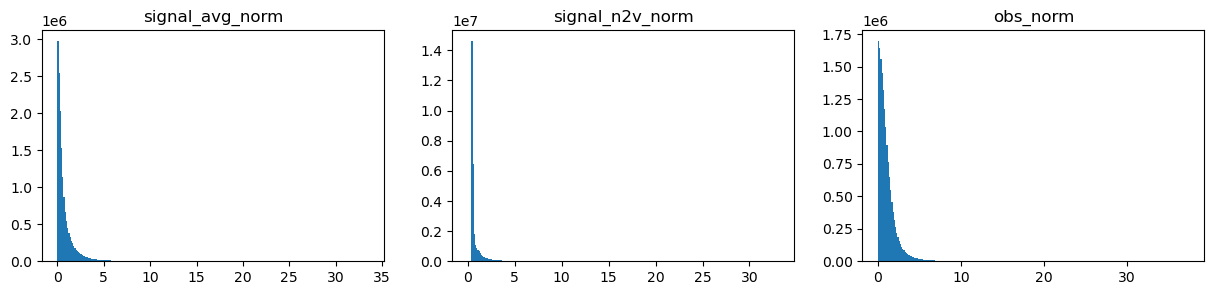

In [5]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
plt.hist(signal_avg_norm[signal_avg!=0].flatten(),bins=256)
plt.title("signal_avg_norm")
plt.subplot(1,3,2)
plt.hist(signal_n2v_norm[signal_n2v!=0].flatten(),bins=256)
plt.title("signal_n2v_norm")
plt.subplot(1,3,3)
plt.hist(observation_norm[observation!=0].flatten(),bins=256)
plt.title("obs_norm")

In [6]:
bins = 256
minVal, maxVal = -18, 1700
histogram_withAvg = histNoiseModel.createHistogram(bins, minVal, maxVal, observation,signal_avg)
histogram_withN2v = histNoiseModel.createHistogram(bins, minVal, maxVal, observation,signal_n2v)

minVal, maxVal = 0, 30
histogram_withAvg_norm = histNoiseModel.createHistogram(bins, minVal, maxVal, observation_norm,signal_avg_norm)
histogram_withN2v_norm = histNoiseModel.createHistogram(bins, minVal, maxVal, observation_norm,signal_n2v_norm)


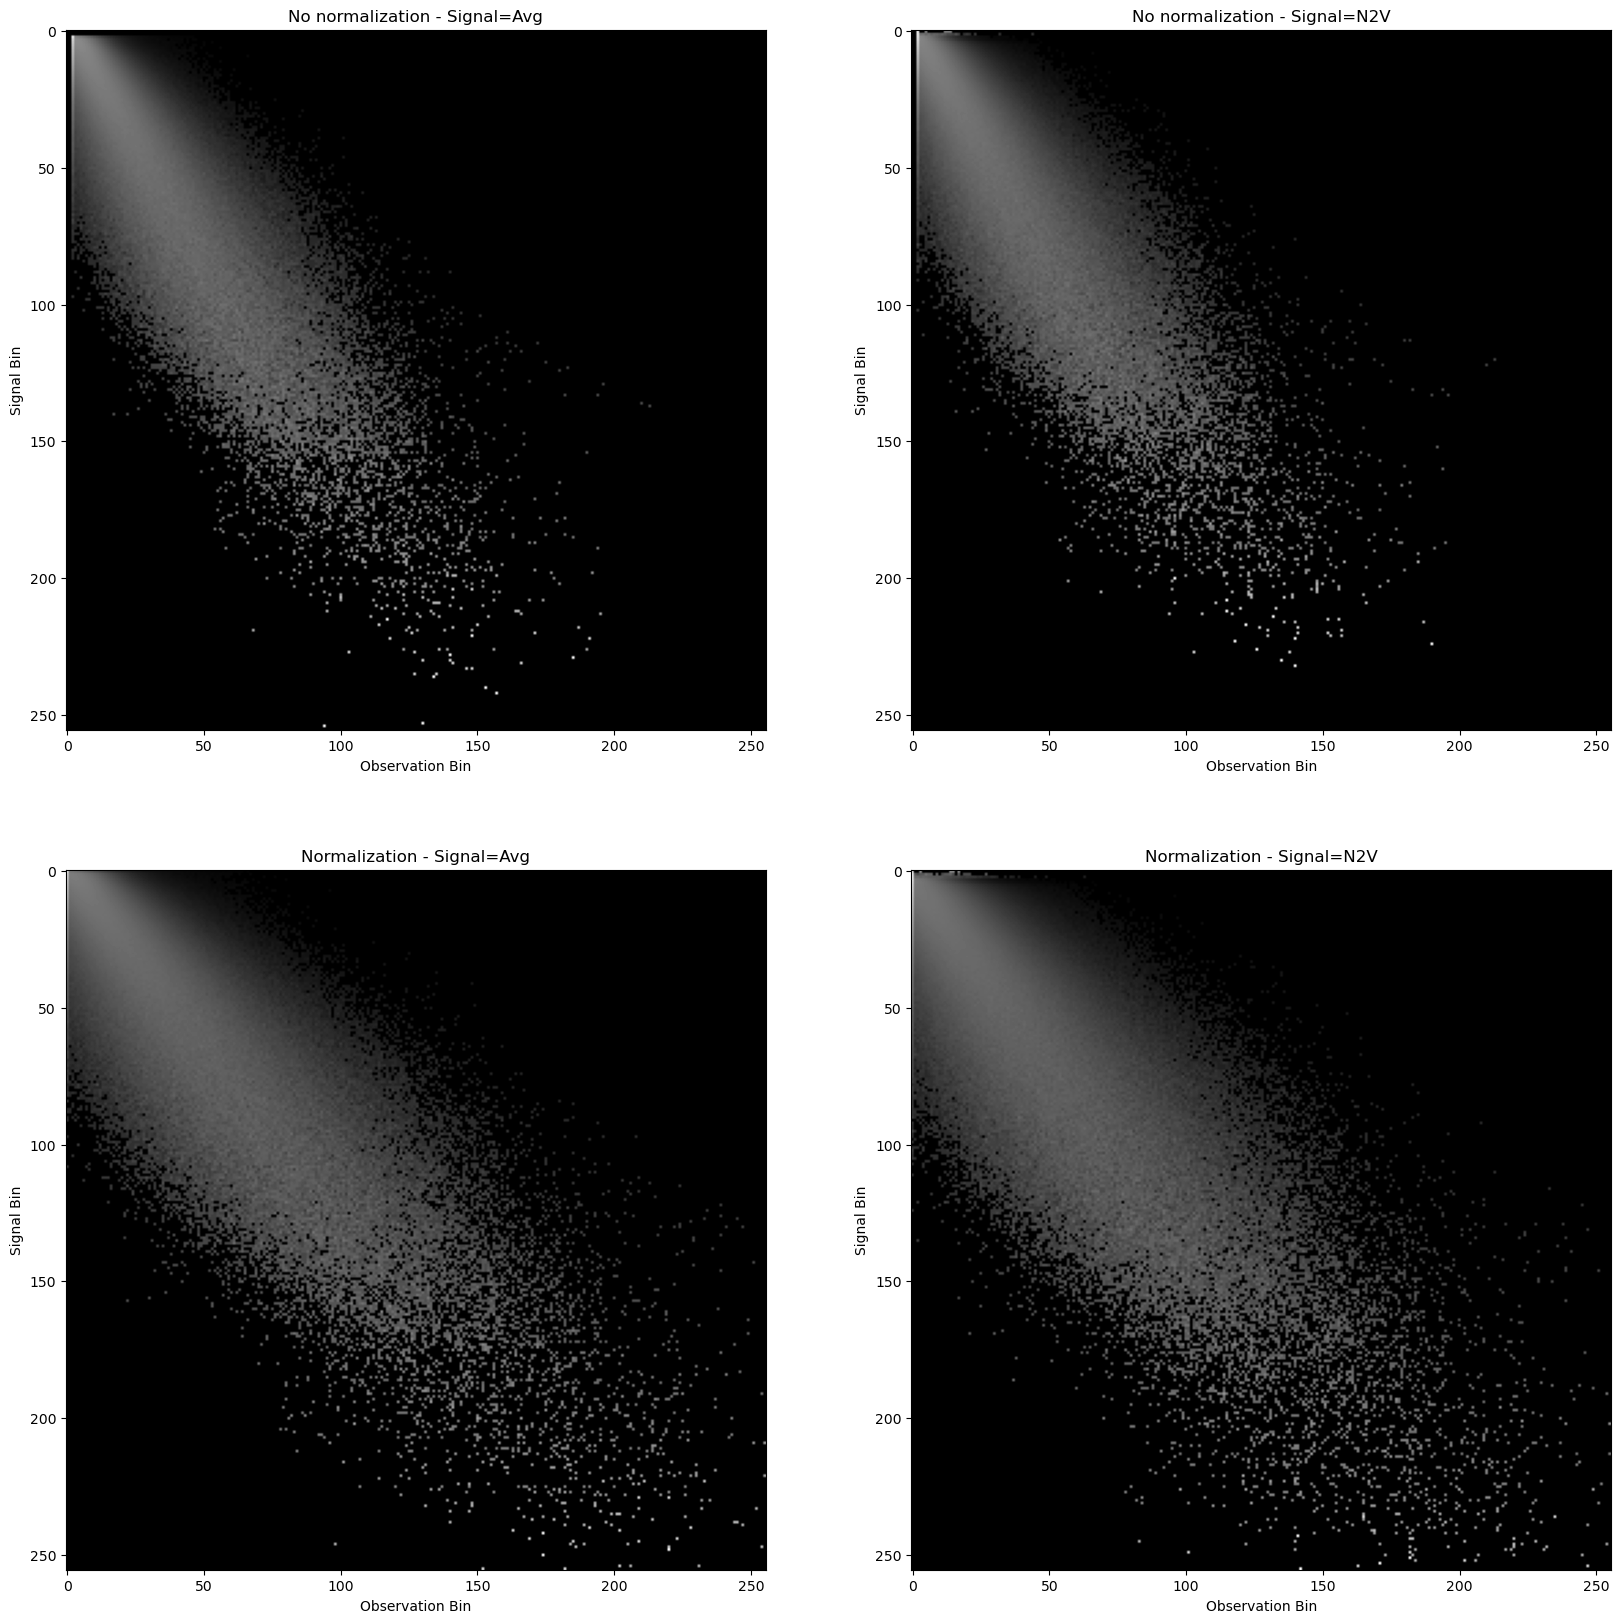

In [7]:
# Plot histogram(s)
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.xlabel('Observation Bin')
plt.ylabel('Signal Bin')
plt.title("No normalization - Signal=Avg")
plt.imshow(histogram_withAvg[0]**0.25, cmap='gray')
plt.subplot(2,2,2)
plt.xlabel('Observation Bin')
plt.ylabel('Signal Bin')
plt.title("No normalization - Signal=N2V")
plt.imshow(histogram_withN2v[0]**0.25, cmap='gray')
plt.subplot(2,2,3)
plt.xlabel('Observation Bin')
plt.ylabel('Signal Bin')
plt.title("Normalization - Signal=Avg")
plt.imshow(histogram_withAvg_norm[0]**0.25, cmap='gray')
plt.subplot(2,2,4)
plt.xlabel('Observation Bin')
plt.ylabel('Signal Bin')
plt.title("Normalization - Signal=N2V")
plt.imshow(histogram_withN2v_norm[0]**0.25, cmap='gray')
plt.show()

In [8]:
# Choose histogram, and corresponding singal and observation
histogram = histogram_withAvg_norm
signal = signal_avg_norm
observation = observation_norm
min_signal=np.min(signal)
max_signal=np.max(signal)
print("Minimum Signal Intensity is", min_signal)
print("Maximum Signal Intensity is", max_signal)
print("Minimum Observation Intensity is", np.min(observation))
print("Maximum Observation Intensity is", np.max(observation))

Minimum Signal Intensity is 0.0
Maximum Signal Intensity is 33.515182
Minimum Observation Intensity is 0.0
Maximum Observation Intensity is 37.399845


In [9]:
# Saving histogram to disc.
dataName = 'Single_AvgGT_normalized_3' 
noise_model_basedir = r"E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\noise_models" 

hist_save_path = noise_model_basedir + "/Hist_" + dataName
np.save(hist_save_path, histogram)
print(f"Histogram saved at {hist_save_path}")

Histogram saved at E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\noise_models/Hist_Single_AvgGT_normalized_3


In [37]:
# Training GMM noise model

nameGMMNoiseModel = "/GMM_" + dataName + ".npz"
n_gaussian = 3 # Number of gaussians to use for Gaussian Mixture Model
n_coeff = 4 # No. of polynomial coefficients for parameterizing the mean, standard deviation and weight of Gaussian components.

gaussianMixtureNoiseModel = GaussianMixtureNoiseModel(min_signal = 0,
                                                    max_signal = 30,
                                                    path=str(noise_model_basedir), weight = None, 
                                                    n_gaussian = n_gaussian,
                                                    n_coeff = n_coeff,
                                                    min_sigma = 1, 
                                                    device = device)

gaussianMixtureNoiseModel.train(signal, observation, batchSize = 250000, n_epochs = 1000, learning_rate=0.1, name = nameGMMNoiseModel)

0 1.3245097398757935
100 1.2649439573287964
200 1.2633415460586548
300 1.262076735496521
400 1.262961745262146
500 1.261803388595581
600 1.2624452114105225
700 1.260482668876648
800 1.2623918056488037
900 1.2615152597427368

The trained parameters (/GMM_Single_AvgGT_normalized_3.npz) is saved at location: E:\dl_monalisa\Data\Vim_fixed_mltplSNR_30nm\noise_models


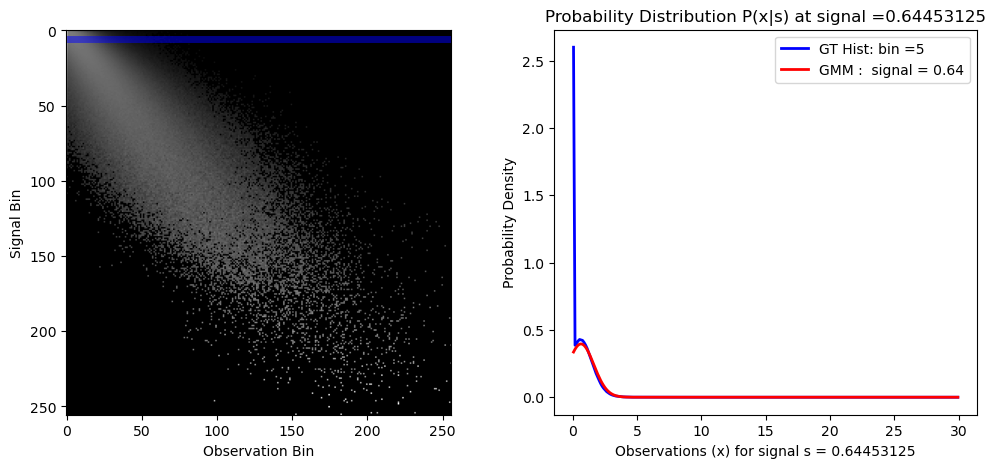

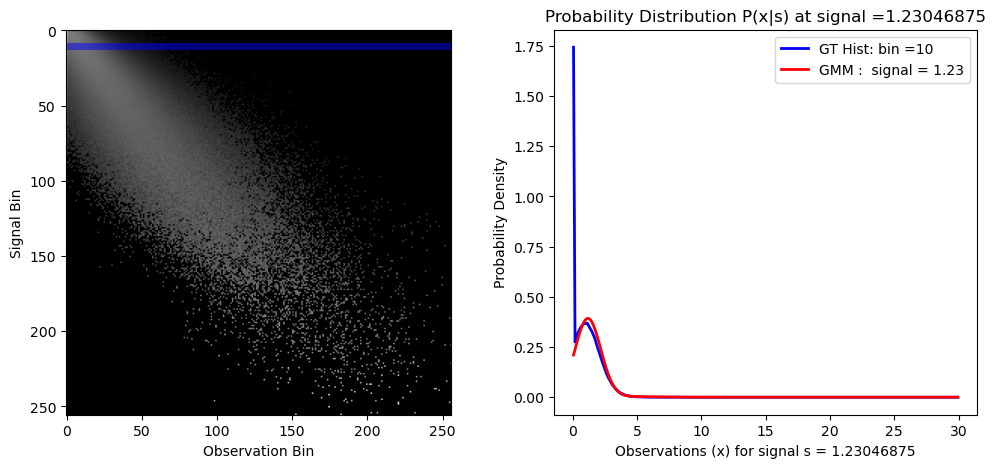

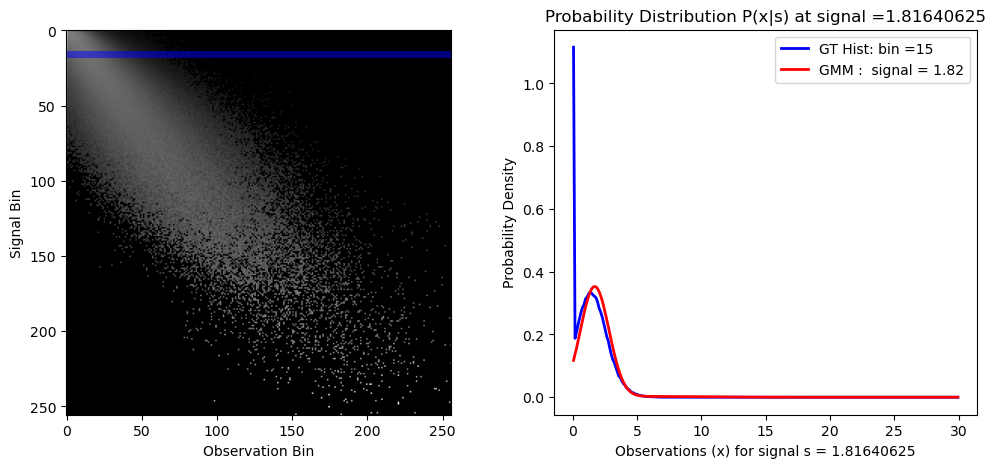

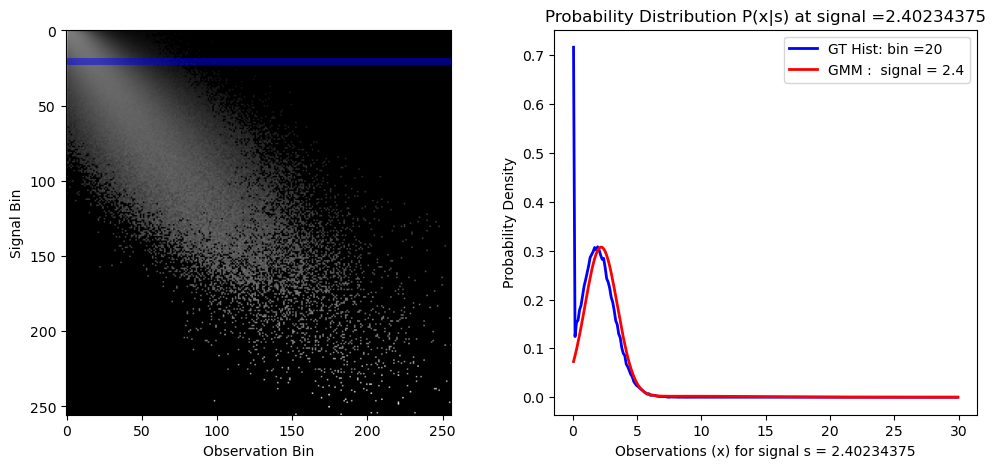

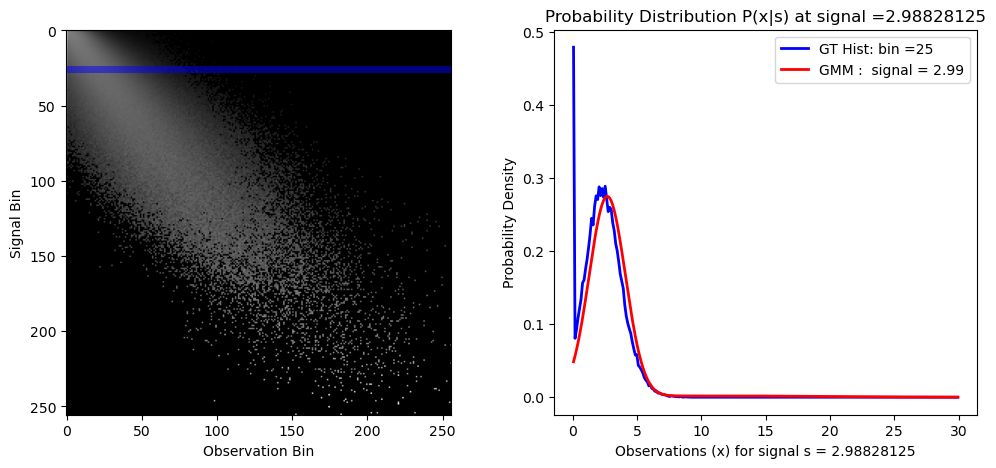

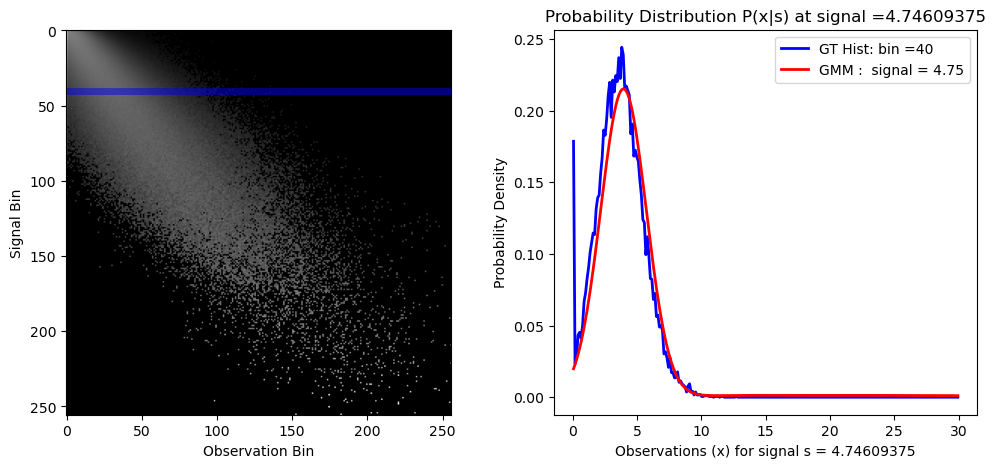

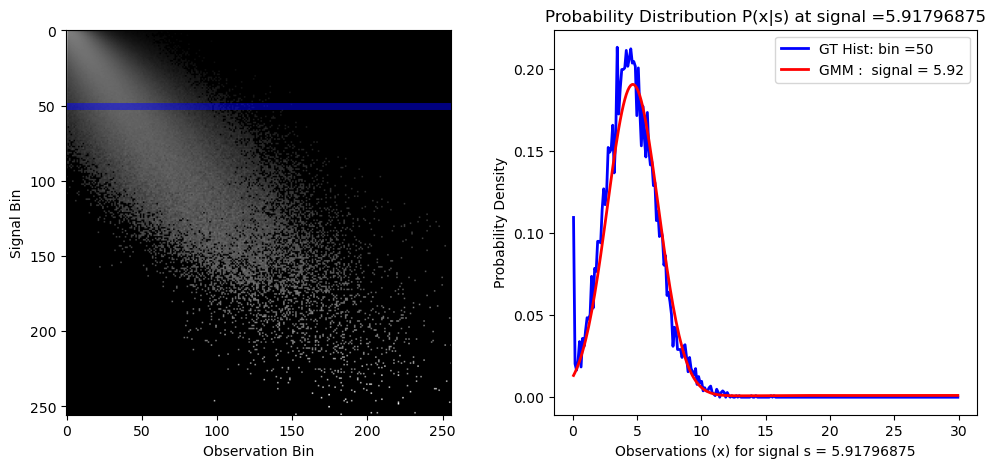

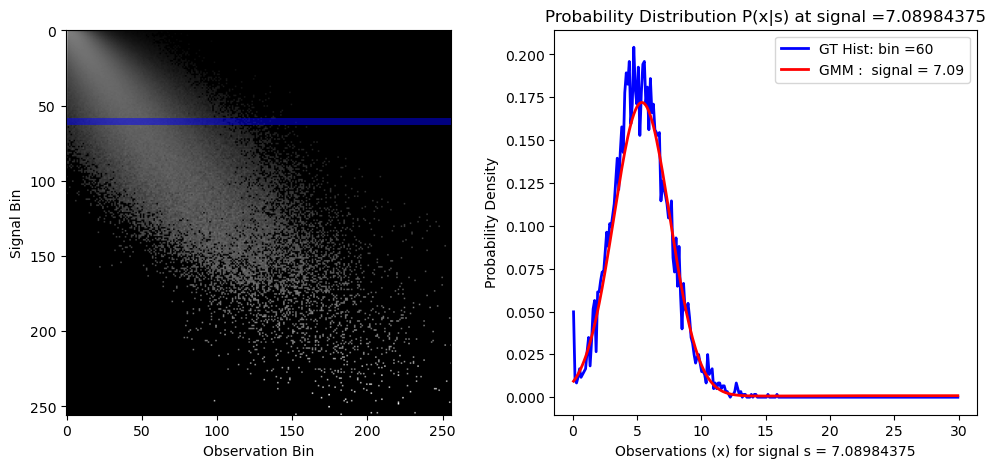

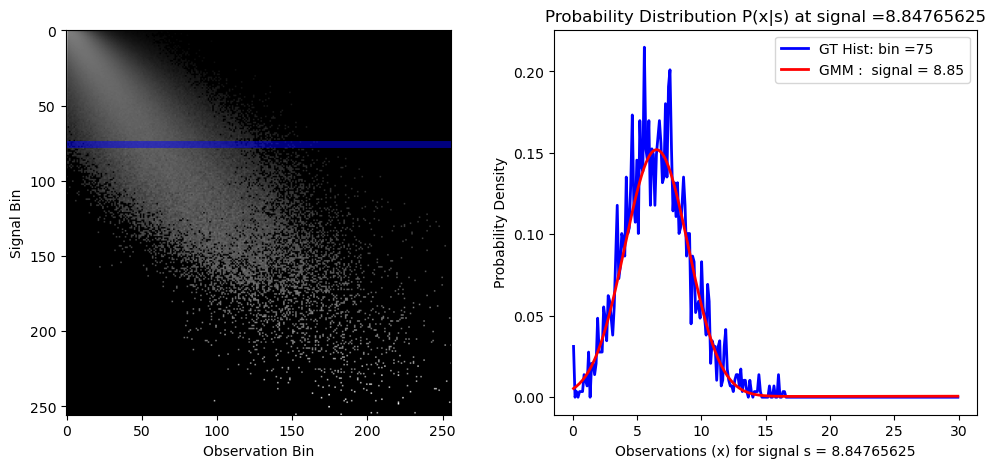

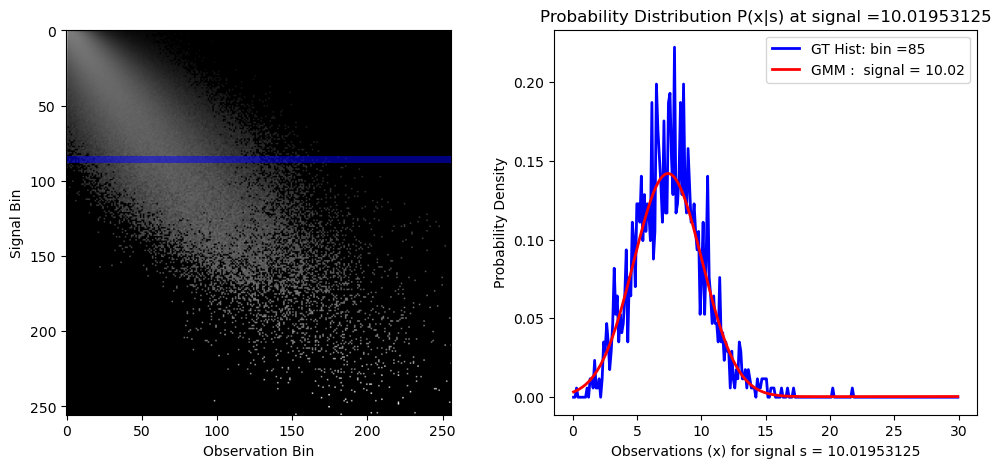

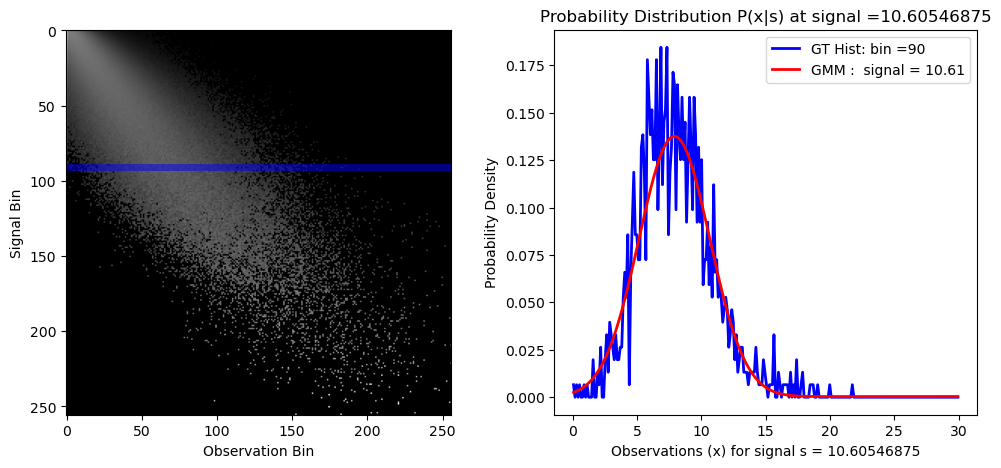

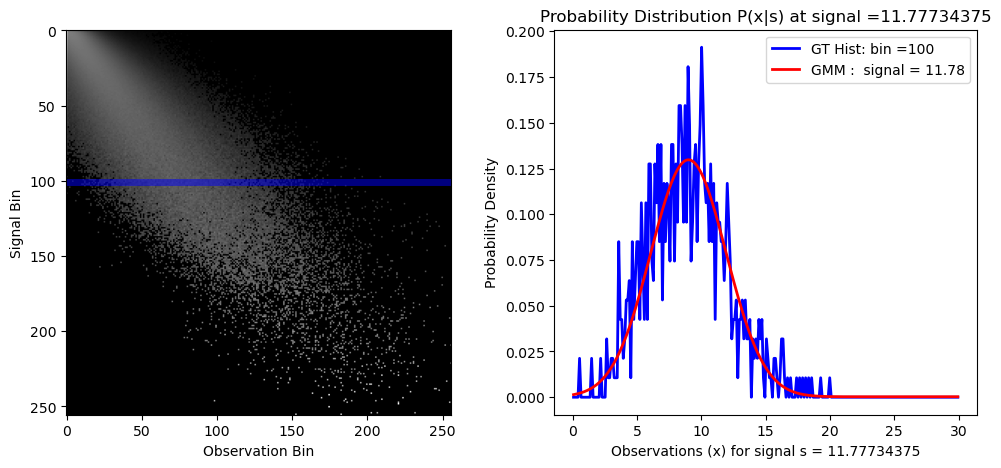

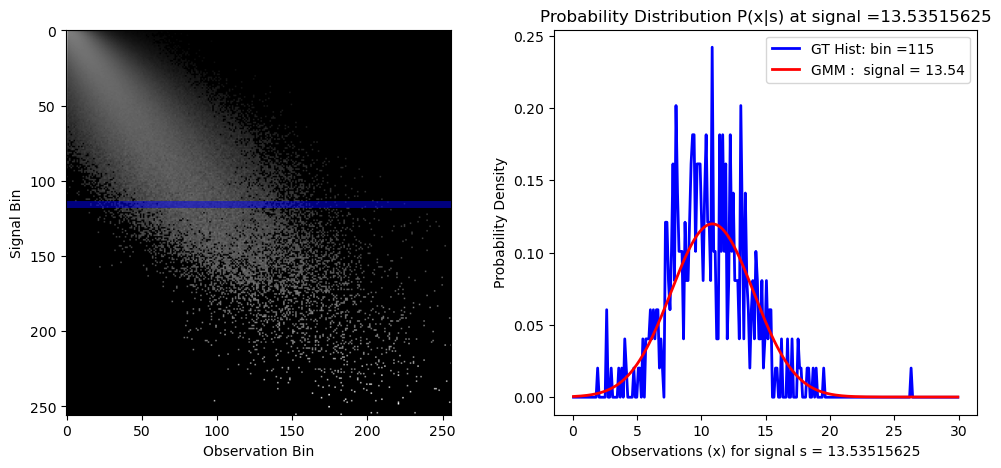

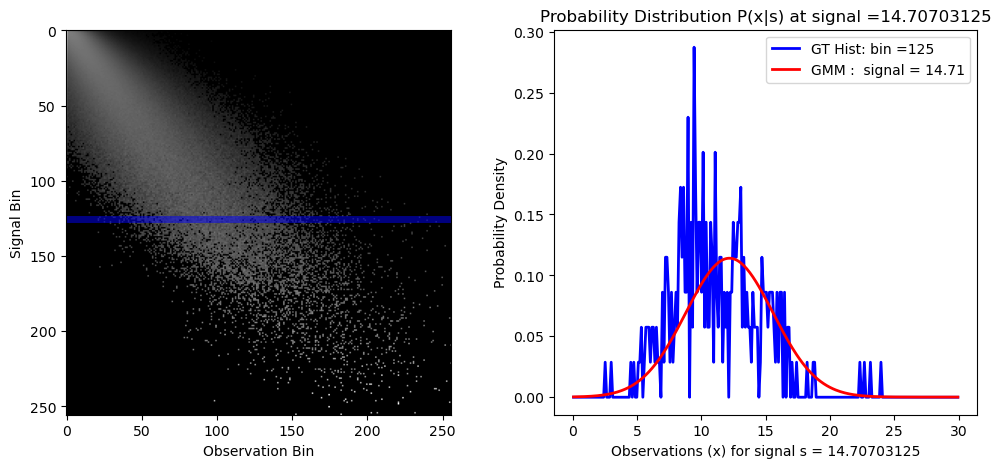

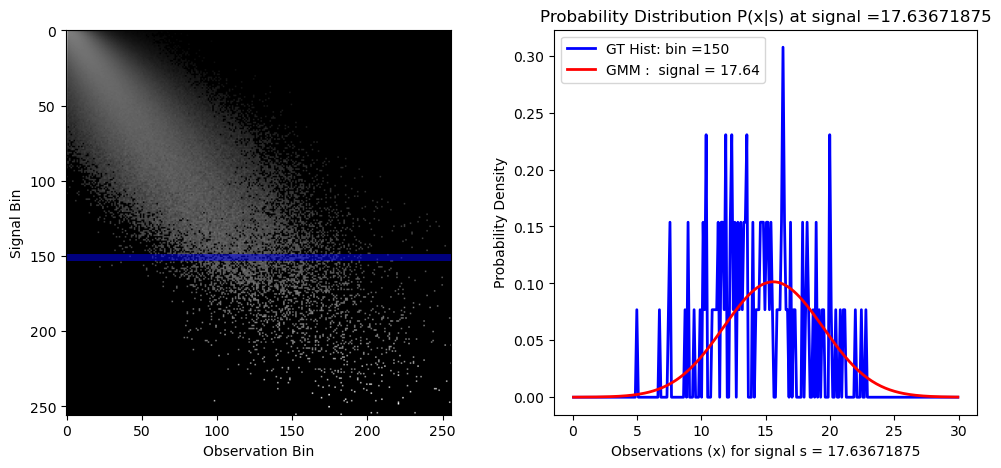

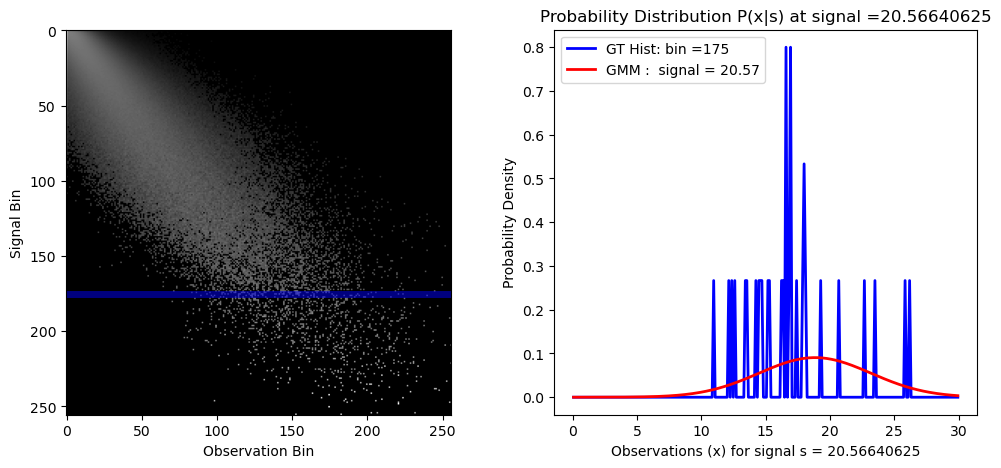

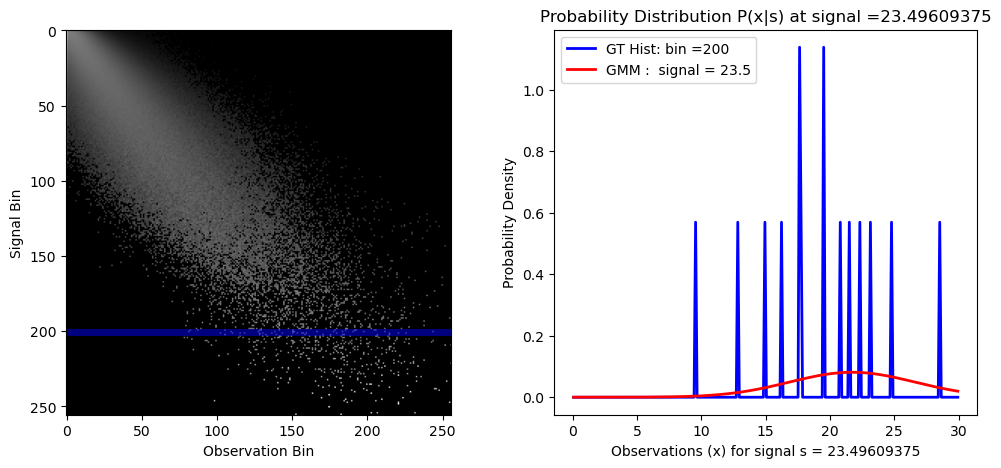

In [38]:
signalBinIndex_list = [5,10,15,20,25,40,50,60,75,85,90,100,115,125,150,175,200]

for binidx in signalBinIndex_list:
    plotProbabilityDistribution(signalBinIndex=binidx, histogram=histogram[0], gaussianMixtureNoiseModel=gaussianMixtureNoiseModel, min_signal=minVal, max_signal=maxVal, n_bin= bins, device=device)